In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
data_file=pd.read_csv("globalterrorismdb_0718dist.csv", encoding="latin1")
dataframe=pd.DataFrame(data_file)
print("Data imported successfully")
dataframe.head()

C:\Users\HP\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Data imported successfully


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [4]:
dataframe.tail()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,...,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,...,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,201712310031,2017,12,31,NaN,0,NaN,92,India,6,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN
181690,201712310032,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Security tightened in Cotabato following IED ...","""Security tightened in Cotabato City,"" Manila ...",NaN,START Primary Collection,-9,-9,0,-9,NaN


In [5]:
dataframe.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [7]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [8]:
dataframe.shape

(181691, 135)

In [9]:
for i in dataframe.columns:
    print(i,end=", ")

eventid, iyear, imonth, iday, approxdate, extended, resolution, country, country_txt, region, region_txt, provstate, city, latitude, longitude, specificity, vicinity, location, summary, crit1, crit2, crit3, doubtterr, alternative, alternative_txt, multiple, success, suicide, attacktype1, attacktype1_txt, attacktype2, attacktype2_txt, attacktype3, attacktype3_txt, targtype1, targtype1_txt, targsubtype1, targsubtype1_txt, corp1, target1, natlty1, natlty1_txt, targtype2, targtype2_txt, targsubtype2, targsubtype2_txt, corp2, target2, natlty2, natlty2_txt, targtype3, targtype3_txt, targsubtype3, targsubtype3_txt, corp3, target3, natlty3, natlty3_txt, gname, gsubname, gname2, gsubname2, gname3, gsubname3, motive, guncertain1, guncertain2, guncertain3, individual, nperps, nperpcap, claimed, claimmode, claimmode_txt, claim2, claimmode2, claimmode2_txt, claim3, claimmode3, claimmode3_txt, compclaim, weaptype1, weaptype1_txt, weapsubtype1, weapsubtype1_txt, weaptype2, weaptype2_txt, weapsubtype2

# Data cleaning

In [10]:
dataframe=dataframe[["iyear","imonth","iday","country_txt","region_txt","provstate","city",
       "latitude","longitude","location","summary","attacktype1_txt","targtype1_txt",
       "gname","motive","weaptype1_txt","nkill","nwound","addnotes"]]
dataframe.head()

,iyear,imonth,iday,country_txt,region_txt,provstate,city,latitude,longitude,location,summary,attacktype1_txt,targtype1_txt,gname,motive,weaptype1_txt,nkill,nwound,addnotes
0,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,NaN,NaN,Assassination,Private Citizens & Property,MANO-D,NaN,Unknown,1.0,0.0,NaN
1,1970,0,0,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,NaN,NaN,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,NaN,Unknown,0.0,0.0,NaN
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,NaN,NaN,Assassination,Journalists & Media,Unknown,NaN,Unknown,1.0,0.0,NaN
3,1970,1,0,Greece,Western Europe,Attica,Athens,37.997490,23.762728,NaN,NaN,Bombing/Explosion,Government (Diplomatic),Unknown,NaN,Explosives,NaN,NaN,NaN
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,NaN,NaN,Facility/Infrastructure Attack,Government (Diplomatic),Unknown,NaN,Incendiary,NaN,NaN,NaN


In [11]:
dataframe.rename(columns={"iyear":"Year","imonth":"Month","iday":"Day","country_txt":"Country",
                   "region_txt":"Region","provstate":"Province/State","city":"City",
                   "latitude":"Latitude","longitude":"Longitude","location":"Location",
                   "summary":"Summary","attacktype1_txt":"Attack Type","targtype1_txt":"Target Type",
                   "gname":"Group Name","motive":"Motive","weaptype1_txt":"Weapon Type",
                   "nkill":"Killed","nwound":"Wounded","addnotes":"Add Notes"},inplace=True)

C:\Users\HP\anaconda3\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [12]:
dataframe.head()

,Year,Month,Day,Country,Region,Province/State,City,Latitude,Longitude,Location,Summary,Attack Type,Target Type,Group Name,Motive,Weapon Type,Killed,Wounded,Add Notes
0,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,NaN,NaN,Assassination,Private Citizens & Property,MANO-D,NaN,Unknown,1.0,0.0,NaN
1,1970,0,0,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,NaN,NaN,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,NaN,Unknown,0.0,0.0,NaN
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,NaN,NaN,Assassination,Journalists & Media,Unknown,NaN,Unknown,1.0,0.0,NaN
3,1970,1,0,Greece,Western Europe,Attica,Athens,37.997490,23.762728,NaN,NaN,Bombing/Explosion,Government (Diplomatic),Unknown,NaN,Explosives,NaN,NaN,NaN
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,NaN,NaN,Facility/Infrastructure Attack,Government (Diplomatic),Unknown,NaN,Incendiary,NaN,NaN,NaN


In [13]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Year            181691 non-null  int64  
 1   Month           181691 non-null  int64  
 2   Day             181691 non-null  int64  
 3   Country         181691 non-null  object 
 4   Region          181691 non-null  object 
 5   Province/State  181270 non-null  object 
 6   City            181257 non-null  object 
 7   Latitude        177135 non-null  float64
 8   Longitude       177134 non-null  float64
 9   Location        55495 non-null   object 
 10  Summary         115562 non-null  object 
 11  Attack Type     181691 non-null  object 
 12  Target Type     181691 non-null  object 
 13  Group Name      181691 non-null  object 
 14  Motive          50561 non-null   object 
 15  Weapon Type     181691 non-null  object 
 16  Killed          171378 non-null  float64
 17  Wounded   

In [14]:
dataframe.shape

(181691, 19)

In [15]:
dataframe.isnull().sum()

Year                   0
Month                  0
Day                    0
Country                0
Region                 0
Province/State       421
City                 434
Latitude            4556
Longitude           4557
Location          126196
Summary            66129
Attack Type            0
Target Type            0
Group Name             0
Motive            131130
Weapon Type            0
Killed             10313
Wounded            16311
Add Notes         153402
dtype: int64

In [16]:
dataframe["Killed"]=dataframe["Killed"].fillna(0)
dataframe["Wounded"]=dataframe["Wounded"].fillna(0)
dataframe["Casualty"]=dataframe["Killed"]+dataframe["Wounded"]

<ipython-input-16-9988bcfff3be>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe["Killed"]=dataframe["Killed"].fillna(0)
<ipython-input-16-9988bcfff3be>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe["Wounded"]=dataframe["Wounded"].fillna(0)
<ipython-input-16-9988bcfff3be>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/

In [17]:
dataframe.describe()

,Year,Month,Day,Latitude,Longitude,Killed,Wounded,Casualty
count,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181691.000000,181691.000000,181691.000000
mean,2002.638997,6.467277,15.505644,23.498343,-4.586957e+02,2.266860,2.883296,5.150156
std,13.259430,3.388303,8.814045,18.569242,2.047790e+05,11.227057,34.309747,40.555416
min,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,11.510046,4.545640e+00,0.000000,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,31.467463,4.324651e+01,0.000000,0.000000,1.000000
75%,2014.000000,9.000000,23.000000,34.685087,6.871033e+01,2.000000,2.000000,4.000000
max,2017.000000,12.000000,31.000000,74.633553,1.793667e+02,1570.000000,8191.000000,9574.000000


# Region wise attack

In [18]:
region_wise_attacks=pd.crosstab(dataframe.Year,dataframe.Region)
region_wise_attacks.head()

Region,Australasia & Oceania,Central America & Caribbean,Central Asia,East Asia,Eastern Europe,Middle East & North Africa,North America,South America,South Asia,Southeast Asia,Sub-Saharan Africa,Western Europe
Year,,,,,,,,,,,,
1970,1,7,0,2,12,28,472,65,1,10,3,50
1971,1,5,0,1,5,55,247,24,0,6,2,125
1972,8,3,0,0,1,53,73,33,1,16,4,376
1973,1,6,0,2,1,19,64,83,1,2,4,290
1974,1,11,0,4,2,42,111,81,2,3,7,317


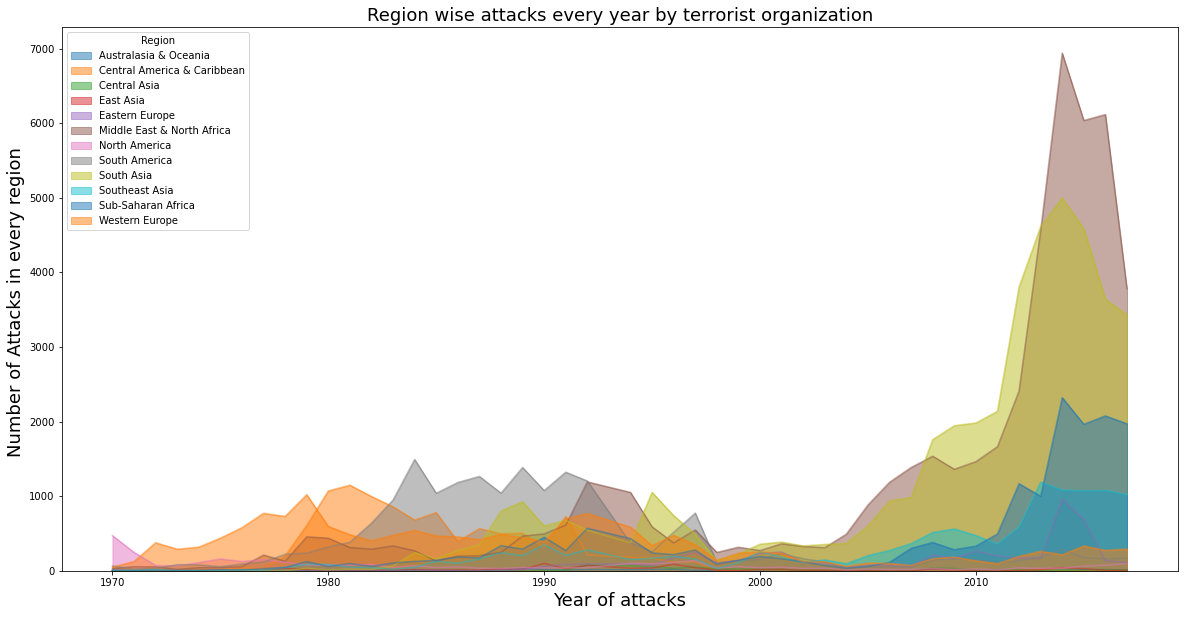

In [19]:
region_wise_attacks.plot(kind="area", stacked=False, alpha=0.5,figsize=(20,10))
plt.title("Region wise attacks every year by terrorist organization",fontsize=18)
plt.xlabel("Year of attacks",fontsize=18)
plt.ylabel("Number of Attacks in every region ",fontsize=18)
plt.show()

# Year wise attacks

In [20]:
attacks=dataframe["Year"].value_counts(dropna=False).sort_index().to_frame().reset_index().rename(columns={"index":"Year","Year":"Attacks"}).set_index("Year")
attacks.head()

,Attacks
Year,
1970,651
1971,471
1972,568
1973,473
1974,581


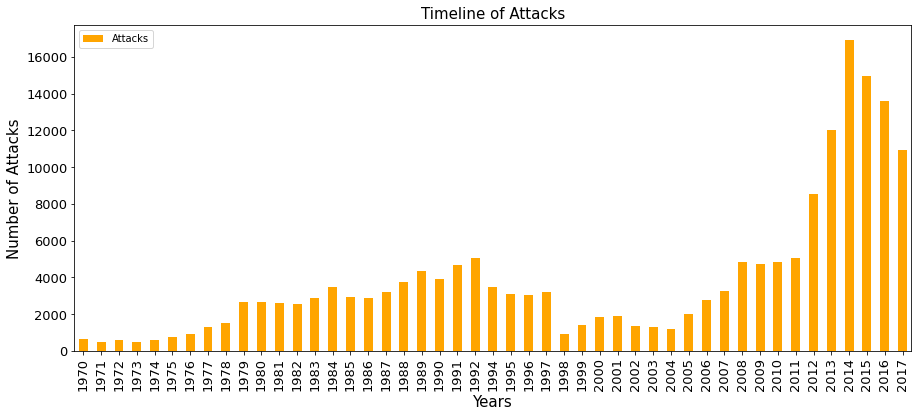

In [21]:
attacks.plot(kind="bar",color="orange",figsize=(15,6),fontsize=13)
plt.title("Timeline of Attacks",fontsize=15)
plt.xlabel("Years",fontsize=15)
plt.ylabel("Number of Attacks",fontsize=15)
plt.show()

In [22]:
person_killed_every_year=dataframe[["Year","Killed"]].groupby("Year").sum()
person_killed_every_year.head()

,Killed
Year,
1970,174.0
1971,173.0
1972,566.0
1973,370.0
1974,539.0


In [23]:
person_wounded_every_year=dataframe[["Year","Wounded"]].groupby("Year").sum()
person_wounded_every_year.head()

,Wounded
Year,
1970,212.0
1971,82.0
1972,409.0
1973,495.0
1974,865.0


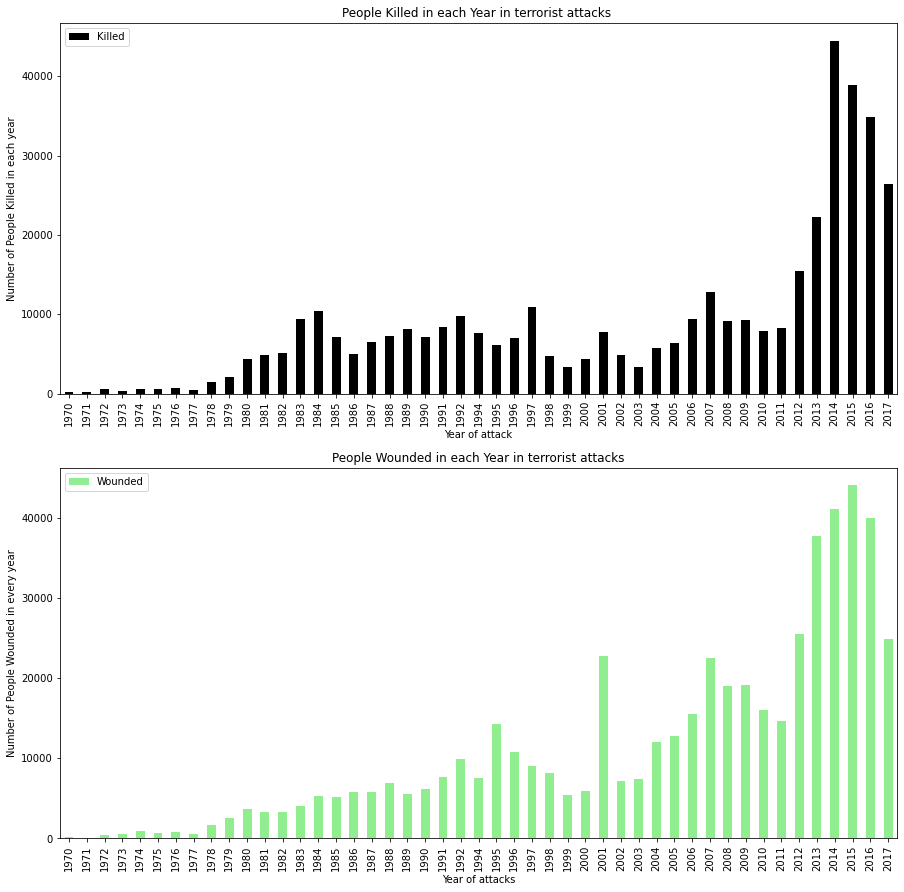

In [24]:
fig=plt.figure()
ax0=fig.add_subplot(2,1,1)

#Killed
person_killed_every_year.plot(kind="bar",color="black",figsize=(15,15),ax=ax0)
ax0.set_title("People Killed in each Year in terrorist attacks ")
ax0.set_xlabel("Year of attack")
ax0.set_ylabel("Number of People Killed in each year") 

#Wounded
ax1=fig.add_subplot(2,1,2)

person_wounded_every_year.plot(kind="bar",color="lightgreen",figsize=(15,15),ax=ax1)
ax1.set_title("People Wounded in each Year in terrorist attacks")
ax1.set_xlabel("Year of attacks")
ax1.set_ylabel("Number of People Wounded in every year")
plt.show()

# Regionwise attacks

In [25]:
region_attacks=region_wise_attacks.transpose()
region_attacks["Total"]=region_attacks.sum(axis=1)
rgn=region_attacks["Total"].sort_values(ascending=True)
rgn

Region
Australasia & Oceania            282
Central Asia                     563
East Asia                        802
North America                   3456
Eastern Europe                  5144
Central America & Caribbean    10344
Southeast Asia                 12485
Western Europe                 16639
Sub-Saharan Africa             17550
South America                  18978
South Asia                     44974
Middle East & North Africa     50474
Name: Total, dtype: int64

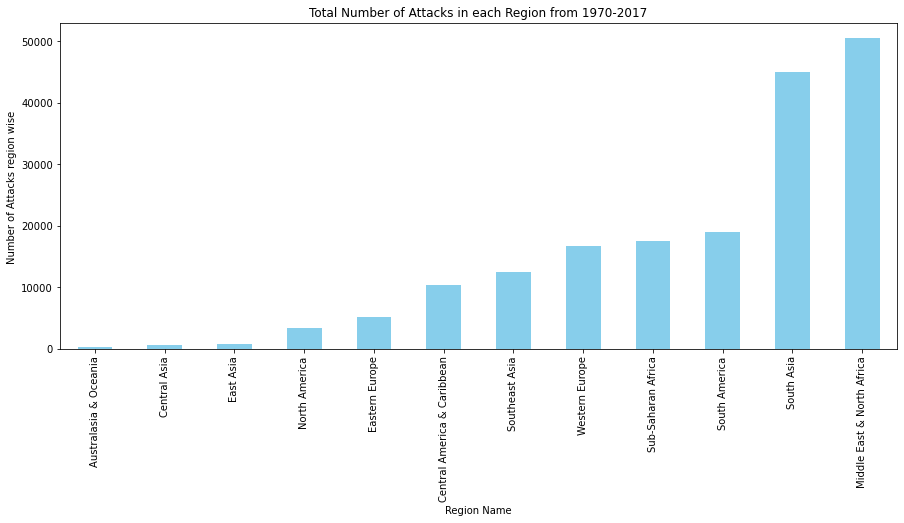

In [26]:
rgn.plot(kind="bar",color="skyblue",figsize=(15,6))
plt.title("Total Number of Attacks in each Region from 1970-2017")
plt.xlabel("Region Name")
plt.ylabel("Number of Attacks region wise ")
plt.show()

In [27]:
Region_wise_Casualty=dataframe[["Region","Casualty"]].groupby("Region").sum().sort_values(by="Casualty",ascending=True)
Region_wise_Casualty

,Casualty
Region,
Australasia & Oceania,410.0
Central Asia,3009.0
East Asia,10365.0
Eastern Europe,19460.0
Western Europe,25026.0
North America,26447.0
Central America & Caribbean,37699.0
Southeast Asia,41896.0
South America,45553.0


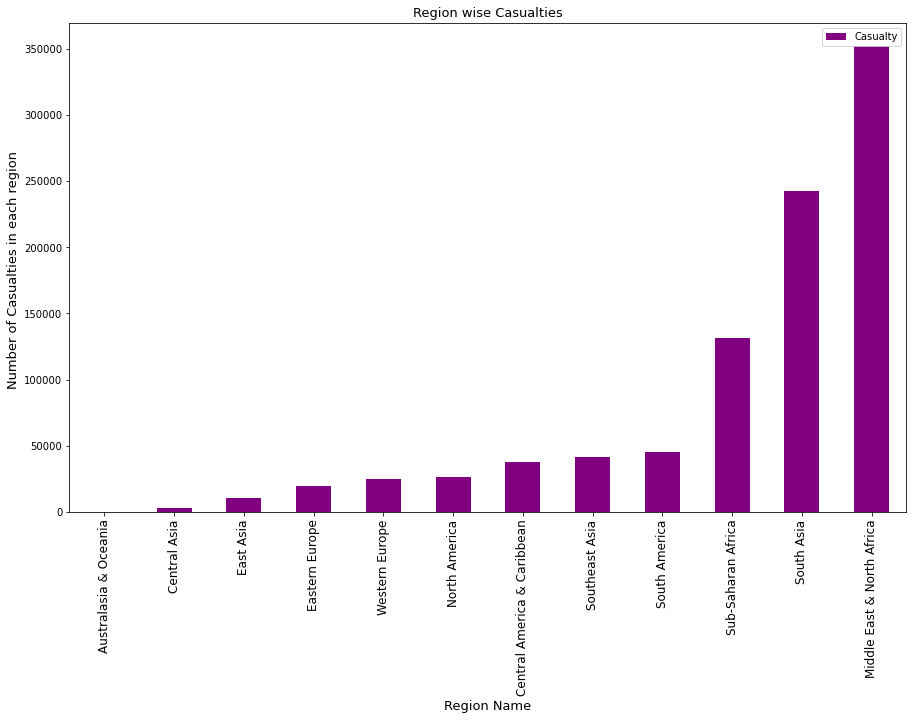

In [28]:
Region_wise_Casualty.plot(kind="bar",color="purple",figsize=(15,9))
plt.title("Region wise Casualties",fontsize=13)
plt.xlabel("Region Name",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Casualties in each region ",fontsize=13)
plt.show()

In [29]:
region_wise_killings=dataframe[["Region","Killed"]].groupby("Region").sum().sort_values(by="Killed",ascending=True)
region_wise_killings

,Killed
Region,
Australasia & Oceania,150.0
Central Asia,1000.0
East Asia,1152.0
North America,4916.0
Western Europe,6694.0
Eastern Europe,7415.0
Southeast Asia,15637.0
Central America & Caribbean,28708.0
South America,28849.0


In [30]:
region_wise_wounded=dataframe[["Region","Wounded"]].groupby("Region").sum().sort_values(by="Wounded",ascending=False)
region_wise_wounded

,Wounded
Region,
Middle East & North Africa,214308.0
South Asia,141360.0
Sub-Saharan Africa,52857.0
Southeast Asia,26259.0
North America,21531.0
Western Europe,18332.0
South America,16704.0
Eastern Europe,12045.0
East Asia,9213.0


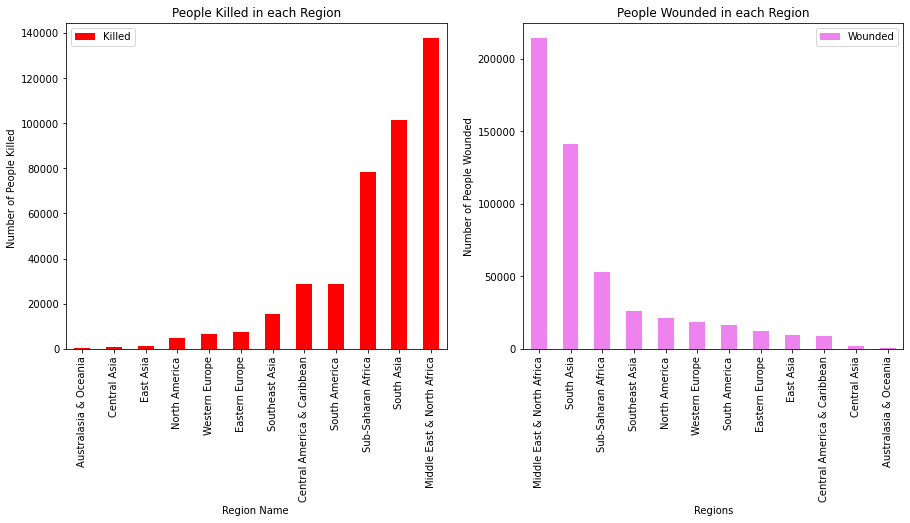

In [31]:
fig=plt.figure()
ax0=fig.add_subplot(1,2,1)
ax1=fig.add_subplot(1,2,2)

#Killed
region_wise_killings.plot(kind="bar",color="red",figsize=(15,6),ax=ax0)
ax0.set_title("People Killed in each Region")
ax0.set_xlabel("Region Name ")
ax0.set_ylabel("Number of People Killed ")

#Wounded
region_wise_wounded.plot(kind="bar",color="violet",figsize=(15,6),ax=ax1)
ax1.set_title("People Wounded in each Region")
ax1.set_xlabel("Regions")
ax1.set_ylabel("Number of People Wounded")

plt.show()

# Country wise attacks

In [32]:
country_wise_attacks=dataframe["Country"].value_counts().head(20)
country_wise_attacks

Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Somalia            4142
Nigeria            3907
Thailand           3849
Yemen              3347
Spain              3249
Sri Lanka          3022
United States      2836
Algeria            2743
France             2693
Egypt              2479
Name: Country, dtype: int64

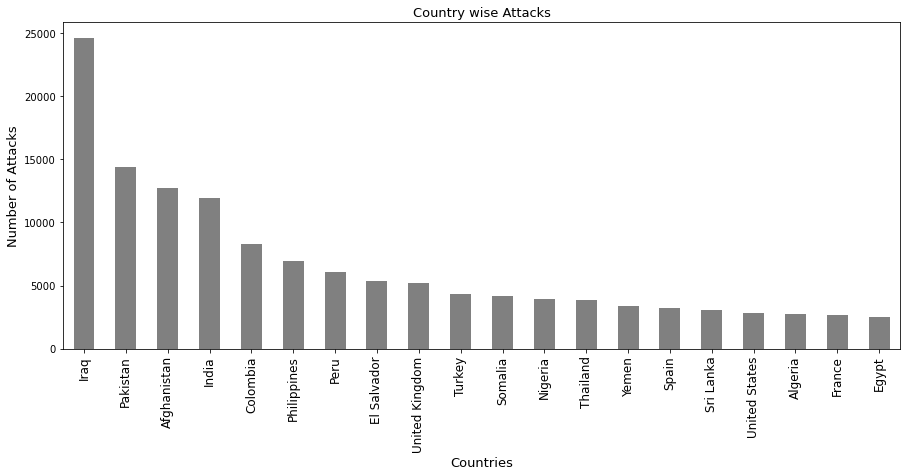

In [33]:
country_wise_attacks.plot(kind="bar",color="grey",figsize=(15,6))
plt.title("Country wise Attacks",fontsize=13)
plt.xlabel("Countries",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Attacks",fontsize=13)
plt.show()

In [34]:
counrty_wise_casualty=dataframe[["Country","Casualty"]].groupby("Country").sum().sort_values(by="Casualty",ascending=False)
counrty_wise_casualty.head(20)

,Casualty
Country,
Iraq,213279.0
Afghanistan,83661.0
Pakistan,65860.0
India,48321.0
Nigeria,32921.0
Sri Lanka,31091.0
Syria,29338.0
Colombia,25026.0
United States,24473.0


<function matplotlib.pyplot.show(close=None, block=None)>

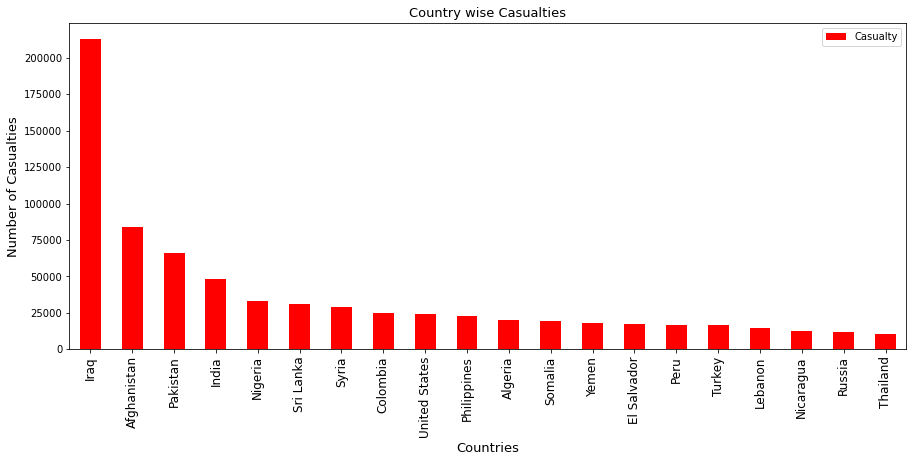

In [35]:
counrty_wise_casualty[:20].plot(kind="bar",color="red",figsize=(15,6))
plt.title("Country wise Casualties",fontsize=13)
plt.xlabel("Countries",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Casualties",fontsize=13)
plt.show

In [36]:
counrty_wise_wounded=dataframe[["Country","Wounded"]].groupby("Country").sum().sort_values(by="Wounded",ascending=False)
counrty_wise_wounded.head(20)

,Wounded
Country,
Iraq,134690.0
Afghanistan,44277.0
Pakistan,42038.0
India,28980.0
United States,20702.0
Sri Lanka,15561.0
Syria,14109.0
Philippines,13367.0
Lebanon,10904.0


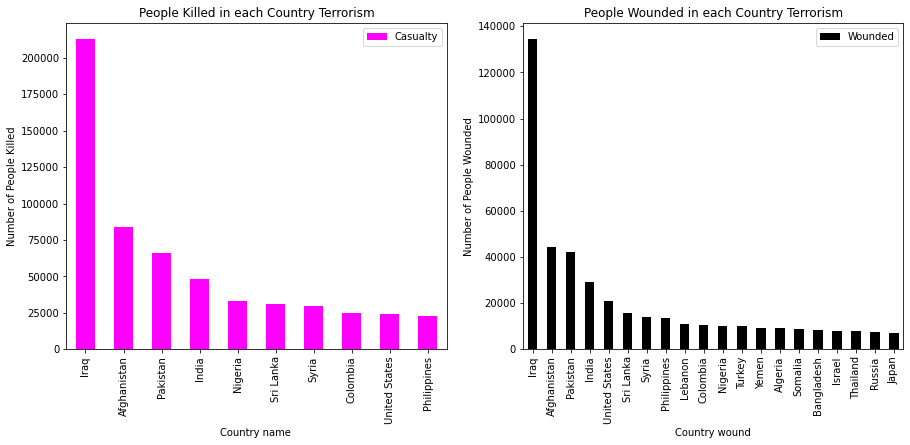

In [37]:
fig=plt.figure()
ax0=fig.add_subplot(1,2,1)
ax1=fig.add_subplot(1,2,2)

#Killed
counrty_wise_casualty[:10].plot(kind="bar",color="magenta",figsize=(15,6),ax=ax0)
ax0.set_title("People Killed in each Country Terrorism")
ax0.set_xlabel("Country name ")
ax0.set_ylabel("Number of People Killed")

#Wounded
counrty_wise_wounded[:20].plot(kind="bar",color="black",figsize=(15,6),ax=ax1)
ax1.set_title("People Wounded in each Country Terrorism")
ax1.set_xlabel("Country wound")
ax1.set_ylabel("Number of People Wounded")

plt.show()